# Fake news detection

Introduction:
There are a lot of news articles, where the news is false or cooked up. With so many advances in Natural Language Processing and machine learning, we can actually build an ml model which is able to detect if a piece of the news article is genuine or fake. Here we will be using artificial neural network models to verify the Genuity of the article.


In [2]:
#Importing necessary lib
import pandas as pd
import numpy as np

In [3]:
#reading data set
fake = pd.read_csv('data.csv')

In [4]:
fake.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [5]:
#Droping URLs
fake=  fake.drop(['URLs'], axis=1)
#Droping non existing values
fake = fake.dropna()

In [6]:
fake.head()

,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [7]:
#assigning values to X and y. X as independent and y as dependent
X = fake.iloc[:,:-1].values
y = fake.iloc[:,-1].values

In [8]:
#checking weather the assigning is correct for X
X[0]

array(['Four ways Bob Corker skewered Donald Trump',
       'Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Som

In [9]:
#checking weather the assigning is correct for y
y[0]

1

# Using CountVectorizer

What is CountVectorizer?
Convert a collection of text documents to a matrix of token counts


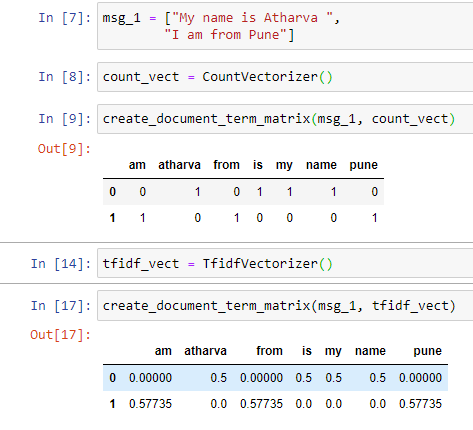

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_body = cv.fit_transform(X[:,1]).todense()


In [11]:
mat_body

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
cv_head = CountVectorizer(max_features=5000)
mat_head = cv_head.fit_transform(X[:,0]).todense()

In [13]:
mat_head

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
#stacking up mat_body and mat_head
X_mat = np.hstack(( mat_head, mat_body))

## Spliting data into train and test data set.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mat,y, test_size=0.2, random_state=0)

## Desision tree classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[422,  12],
       [ 19, 345]], dtype=int64)

In [18]:
#checking accuracy
(424+345)/(424+10+19+345)

0.9636591478696742

# Using TfidfVectorizer and PassiveAggressiveClassifier

In [20]:
#importing requried lab
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

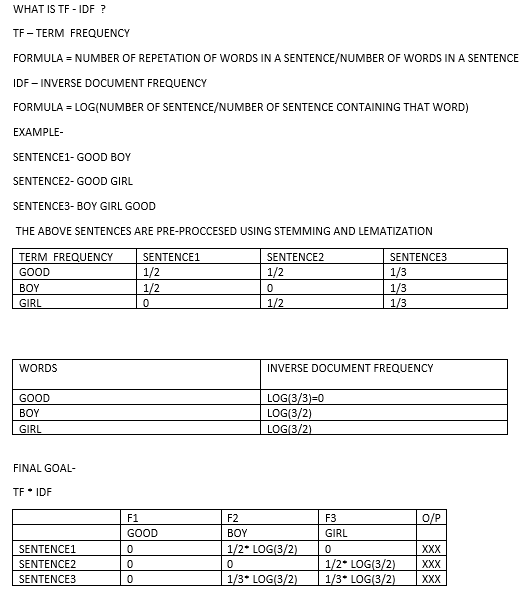

What is a PassiveAggressiveClassifier?


Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

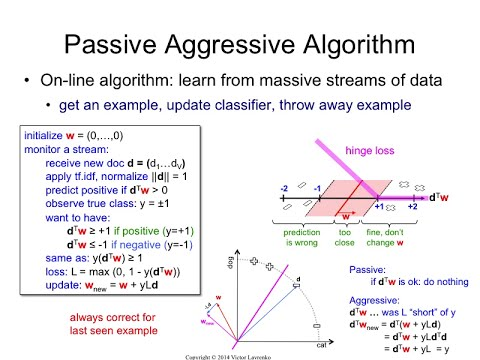

In [21]:
x_train,x_test,y_train,y_test=train_test_split(fake['Headline'], fake.Label, test_size=0.2, random_state=7)

In [22]:
#Initializing a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [23]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predicting on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.21%


The reason behind less accuracy is I have not done the stemming and lemmatization.

In [24]:
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[359,  50],
       [ 68, 321]], dtype=int64)

REFERENCE:
https://www.greatlearning.in
https://www.analyticsvidhya.com
https://www.kaggle.com/datasets

